In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Data yang digunakan

https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset?resource=download

In [2]:
# Membaca data
df = pd.read_csv('populationbycountry.csv') # Dari kaggle
df

,Nation,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,North America,320.27638,324.44694,328.62014,332.72487,336.72143,340.74811,344.89548,349.07829,353.2939,...,417.83236,422.05268,426.06238,430.26938,434.47232,438.82964,443.3473,447.67394,451.83698,456.59331
1,Bermuda,0.05473,0.05491,0.05517,0.05551,0.05585,0.05618,0.05651,0.05683,0.05717,...,0.06361,0.06418,0.06476,0.06534,0.06591,0.06644,0.06692,0.06739,0.06784,0.06827
2,Canada,24.5933,24.9,25.2019,25.4563,25.7018,25.9416,26.2038,26.5497,26.8948,...,31.37674,31.64096,31.88931,32.13476,32.38638,32.65668,32.93596,33.2127,33.48721,33.75974
3,Greenland,0.05021,0.05103,0.05166,0.05211,0.05263,0.05315,0.05364,0.0541,0.05485,...,0.05713,0.05736,0.05754,0.0577,0.05778,0.05764,0.05753,0.05756,0.0576,0.05764
4,Mexico,68.34748,69.96926,71.6409,73.36288,75.08014,76.76723,78.44243,80.12249,81.78182,...,101.24696,102.47993,103.71806,104.95959,106.2029,107.44953,108.70089,109.9554,111.21179,112.46886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,U.S. Pacific Islands,0.13796,0.14283,0.14762,0.15281,0.15825,0.16406,0.17104,0.17903,0.18841,...,0.25365,0.25739,0.26116,0.26494,0.25814,0.24957,0.24888,0.24678,0.24424,0.24221
228,Vanuatu,0.11679,0.12026,0.12379,0.12738,0.13103,0.13473,0.13848,0.14227,0.14612,...,0.19317,0.19646,0.19971,0.20293,0.20609,0.20922,0.21234,0.21545,0.21852,0.22155
229,Vietnam,53.7152,54.90268,56.14218,57.43635,58.76204,60.09307,61.43983,62.82649,64.21135,...,80.20948,81.25796,82.29659,83.35245,84.42493,85.47054,86.51885,87.55836,88.57676,89.57113
230,Wake Island,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Filter data
country = 'Indonesia'
nation = df.loc[df['Nation'] == country]
nation

,Nation,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
201,Indonesia,151.0244,154.13906,157.27963,160.44071,163.61264,166.77028,169.89552,173.01546,176.16566,...,217.83628,220.97191,223.06967,226.00413,228.89575,231.82024,234.694,237.51236,240.27152,242.96834


In [4]:
# Mengambil data populasi untuk negara Indonesia
population = df[df['Nation'] == country].iloc[:, 1:].values.flatten() # flatten() untuk membuat array 2D menjadi 1D
print(population)

# Mengubah isi data menjadi bentuk float
population = population.astype(float)

['151.0244' '154.13906' '157.27963' '160.44071' '163.61264' '166.77028'
 '169.89552' '173.01546' '176.16566' '179.33997' '182.51628' '185.70794'
 '188.90468' '192.09324' '195.3278' '198.63437' '202.01216' '205.27672'
 '208.47748' '211.6872' '214.67661' '217.83628' '220.97191' '223.06967'
 '226.00413' '228.89575' '231.82024' '234.694' '237.51236' '240.27152'
 '242.96834']


In [5]:
# Membuat X dan y untuk digunakan dalam Regresi Linear
X = np.arange(1980, 2011).reshape(-1, 1)
y = population.reshape(-1, 1)

In [6]:
# Data X
X

array([[1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010]])

In [7]:
# Data y
y

array([[151.0244 ],
       [154.13906],
       [157.27963],
       [160.44071],
       [163.61264],
       [166.77028],
       [169.89552],
       [173.01546],
       [176.16566],
       [179.33997],
       [182.51628],
       [185.70794],
       [188.90468],
       [192.09324],
       [195.3278 ],
       [198.63437],
       [202.01216],
       [205.27672],
       [208.47748],
       [211.6872 ],
       [214.67661],
       [217.83628],
       [220.97191],
       [223.06967],
       [226.00413],
       [228.89575],
       [231.82024],
       [234.694  ],
       [237.51236],
       [240.27152],
       [242.96834]])

### Model Machine Learning

In [8]:
# Model Regresi Linear
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [9]:
# Kenaikan penduduk tiap tahun
model.coef_[0][0]

3.1036846774193534

Population in 2011: 247.96 million
Population in 2012: 251.08 million
Population in 2013: 254.19 million
Population in 2014: 257.31 million
Population in 2015: 260.42 million
Population in 2016: 263.54 million
Population in 2017: 266.65 million
Population in 2018: 269.76 million
Population in 2019: 272.88 million
Population in 2020: 275.99 million
Population in 2021: 279.11 million
Population in 2022: 282.22 million
Population in 2023: 285.34 million
Population in 2024: 288.45 million
Population in 2025: 291.56 million
Population in 2026: 294.68 million
Population in 2027: 297.79 million
Population in 2028: 300.91 million
Population in 2029: 304.02 million
Population in 2030: 307.14 million
Population in 2031: 310.25 million
Population in 2032: 313.36 million
Population in 2033: 316.48 million
Population in 2034: 319.59 million
Population in 2035: 322.71 million


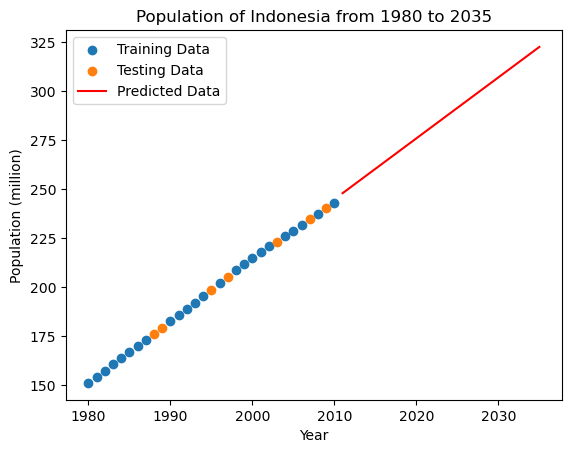

Model score: 0.9989959088454314


In [10]:
# Data di bagi menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data di fit untuk melakukan prediksi dengan Regresi Linear
model.fit(X_train, y_train)

# Prediksi populasi
y_pred_train = model.predict(X_train) # Prediksi data latih
y_pred_test = model.predict(X_test) # Prediksi data uji

# Prediksi populasi tahun 2011 sampai 2035
X_pred = np.arange(2011, 2036).reshape(-1, 1)
y_pred = model.predict(X_pred)

# Print jumlah populasi yang di prediksikan
for year, pop in zip(X_pred.flatten(), y_pred.flatten()): # zip untuk menggabungkan dua array
    print(f"Population in {year}: {pop:.2f} million")

# Plot SCatter
plt.scatter(X_train.flatten(), y_train.flatten(), label='Training Data')
plt.scatter(X_test.flatten(), y_test.flatten(), label='Testing Data')

# Plot data yang di prediksi
plt.plot(X_pred.flatten(), y_pred.flatten(), label='Predicted Data', color='red')

plt.xlabel("Year")
plt.ylabel("Population (million)")
plt.title(f"Population of {country} from 1980 to 2035")
plt.legend()
plt.show()

# Print keakuratan model Machine Learning
print("Model score:", model.score(X_test, y_test))

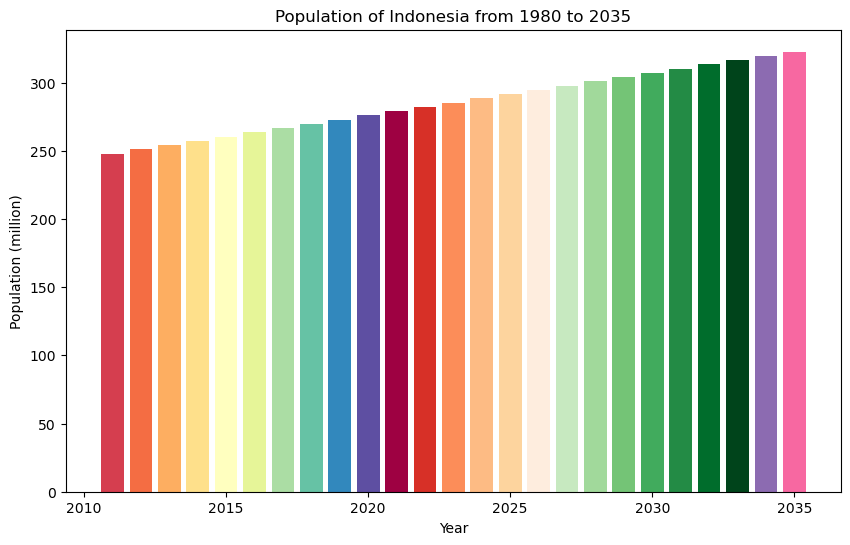

In [12]:
colors = ['#d53e4f', '#f46d43', '#fdae61', '#fee08b', '#ffffbf', '#e6f598', '#abdda4', '#66c2a5', '#3288bd', '#5e4fa2',
          '#9e0142', '#d73027', '#fc8d59', '#fdbb84', '#fdd49e', '#feedde', '#c7e9c0', '#a1d99b', '#74c476', '#41ab5d',
          '#238b45', '#006d2c', '#00441b', '#8c6bb1', '#f768a1']

plt.figure(figsize=(10,6))
plt.bar(X_pred.flatten(), y_pred.flatten(), color=colors)
plt.xlabel("Year")
plt.ylabel("Population (million)")
plt.title(f"Population of {country} from 1980 to 2035")
plt.show()

### Link GitHub

https://github.com/SyFex25/Predicting-Indonesia-Population-by-2035-Using-AI.git

### Komitmen Integritas

“Di hadapan TUHAN yang hidup, saya menegaskan bahwa saya tidak memberikan maupun
menerima bantuan apapun—baik lisan, tulisan, maupun elektronik—di dalam ujian ini selain
daripada apa yang telah diizinkan oleh pengajar, dan tidak akan menyebarkan baik soal
maupun jawaban ujian kepada pihak lain.”

Persentase Pekerjaan:

Henokh -> 33%
Gilbert -> 33%
Septio -> 33%